IMPORTING LIBRARIES

In [2]:

import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__))

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__))

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Any results you write to the current directory are saved as output.

Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
pandas version: 2.0.3
matplotlib version: 3.7.1
NumPy version: 1.25.2
SciPy version: 1.11.4
IPython version: 7.34.0
scikit-learn version: 1.2.2
-------------------------


Importing Visualization and ML libraries

In [3]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

3c.Extracting Dat

In [4]:
#Loading the single csv file to a variable named 'data'
HR=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

Examining dataset


The shape of the  data is (row, column):(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1

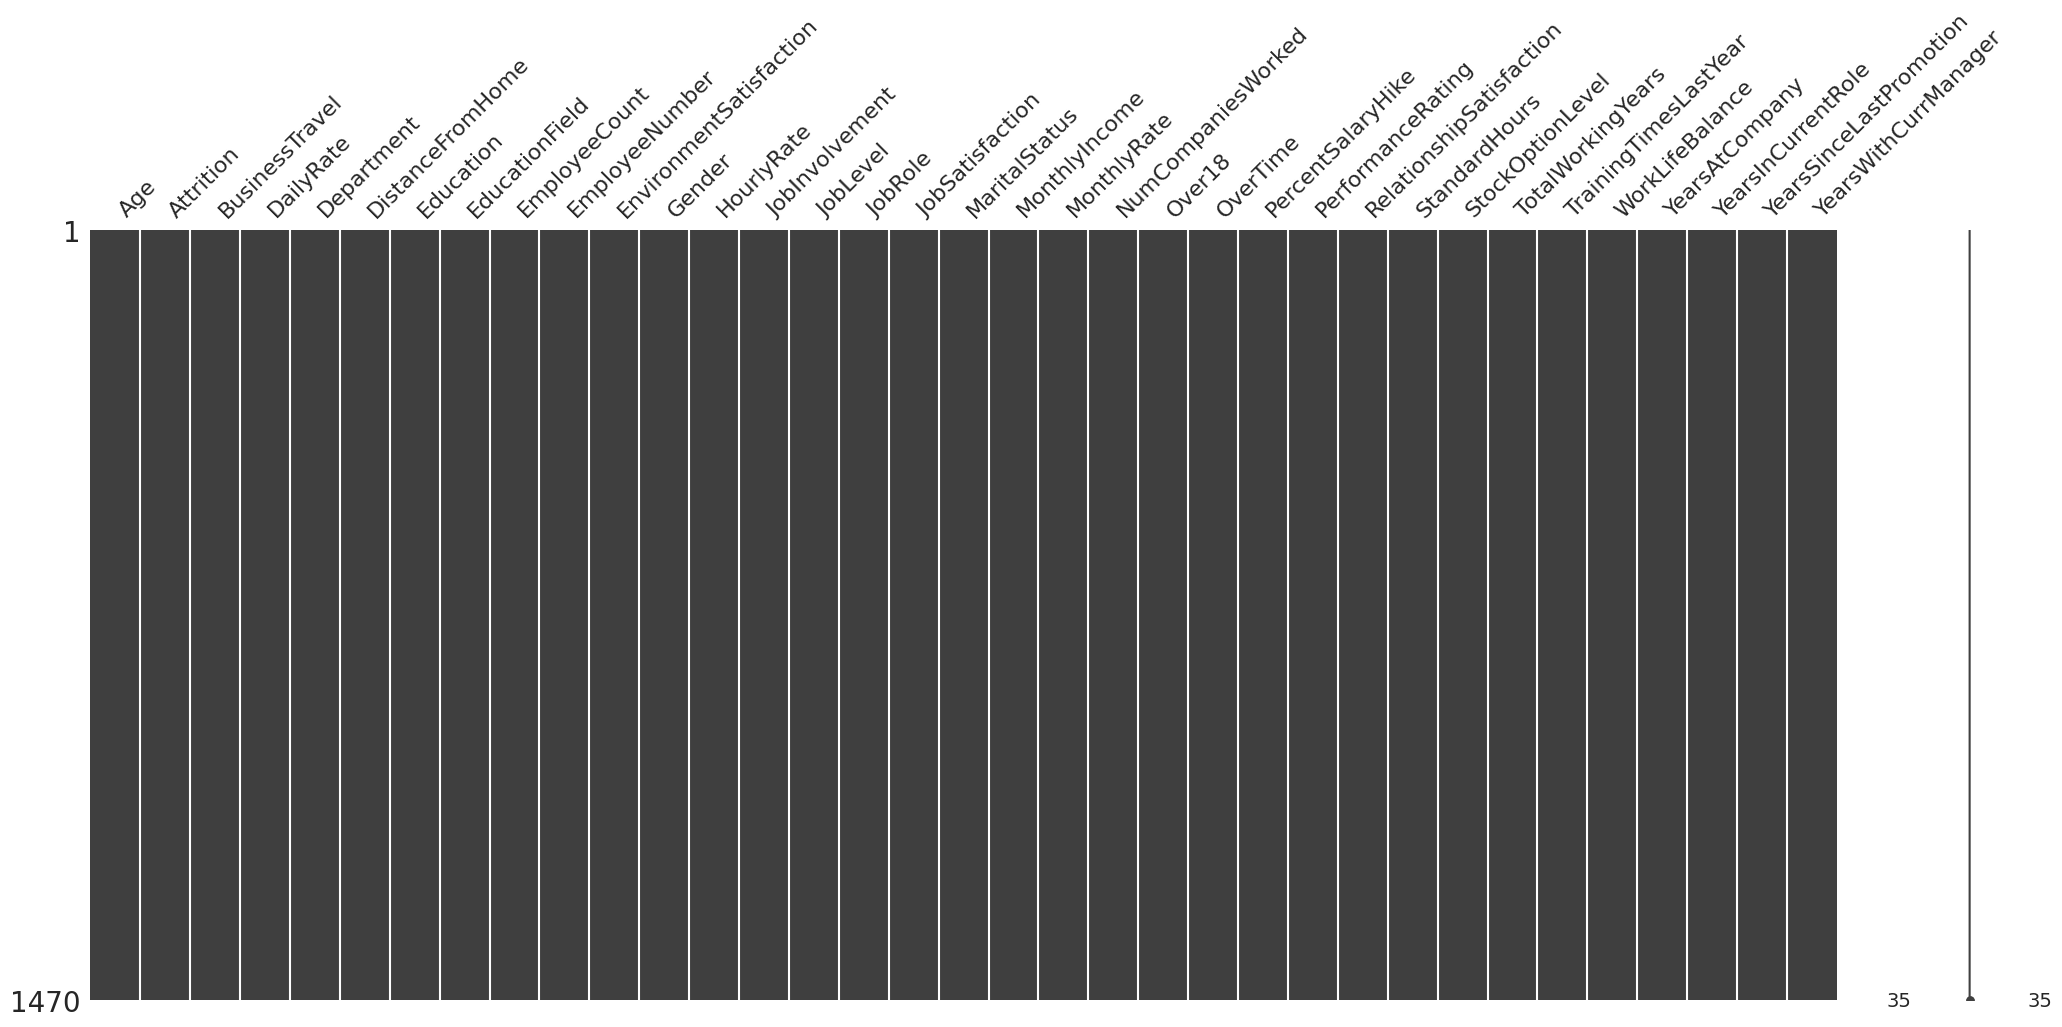

In [5]:
HR.head()
#Lets look at no.of columns and information about its factors
print ("The shape of the  data is (row, column):"+ str(HR.shape))
print (HR.info())
#Looking at the datatypes of each factor
HR.dtypes
import missingno as msno
msno.matrix(HR);


In [6]:
print('Data columns with null values:',HR.isnull().sum(), sep = '\n')

Data columns with null values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

In [7]:
print('Data columns with null values:',HR.isnull().sum(), sep = '\n')

Data columns with null values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

DATA VISUALIZATION

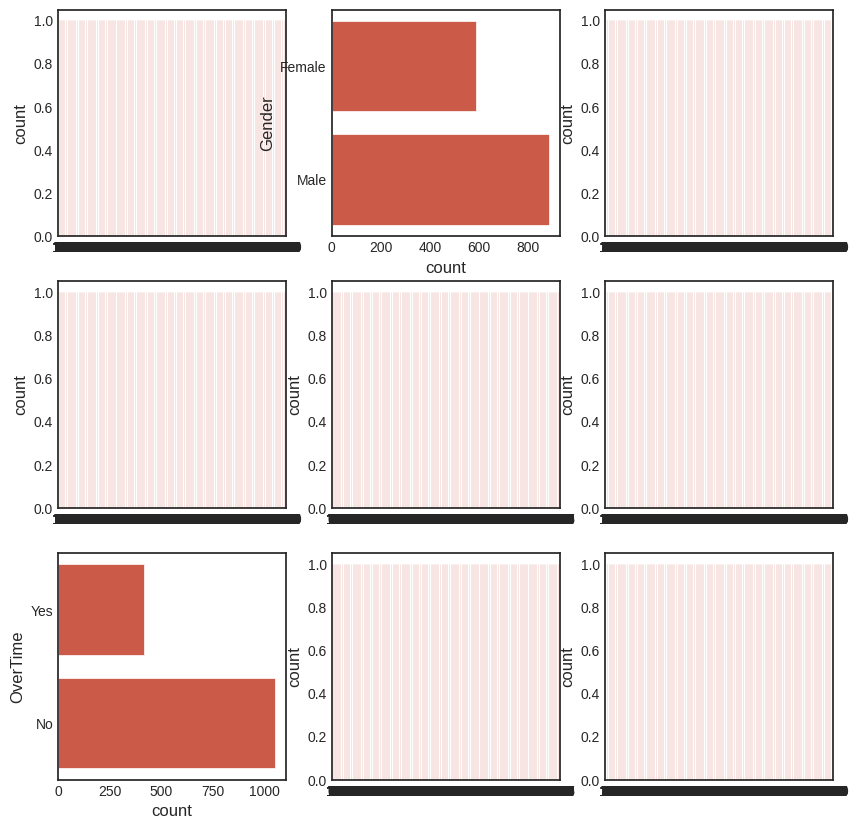

In [8]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
label = LabelEncoder()
HR['EducationField'] = label.fit_transform(HR['EducationField'])
sns.countplot(HR['EducationField'],)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.countplot(HR['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.countplot(HR['JobInvolvement'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.countplot(HR.JobSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(335)
sns.countplot(HR.EnvironmentSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.countplot(HR.RelationshipSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.countplot(HR.OverTime)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.countplot(HR.WorkLifeBalance)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(339)
sns.countplot(HR.StockOptionLevel)
fig = plt.gcf()
fig.set_size_inches(10,10)

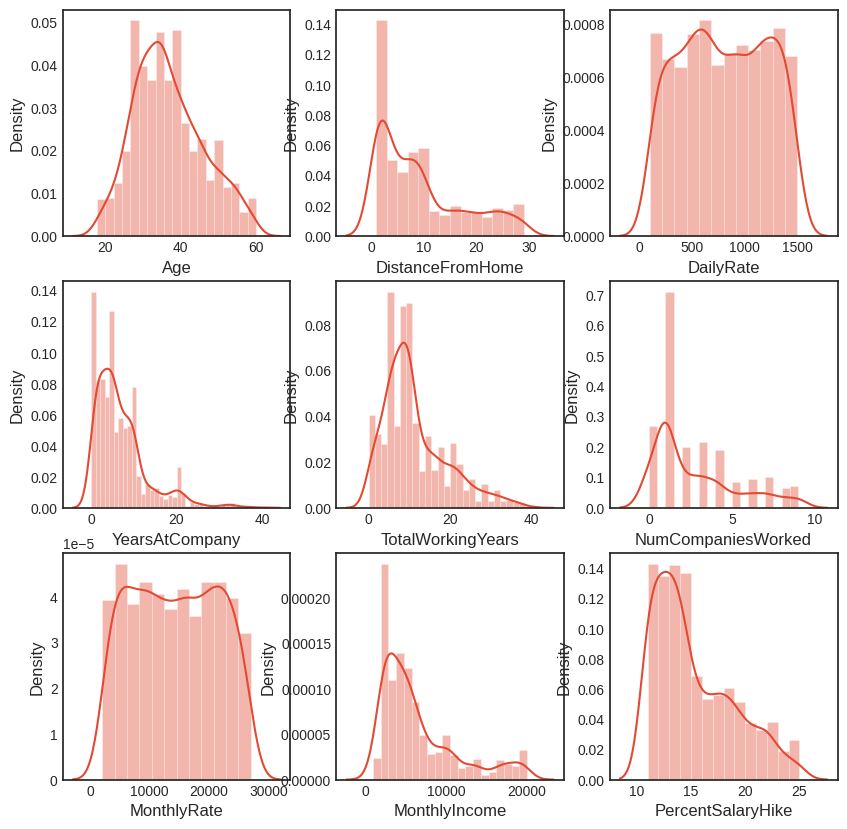

In [9]:

plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
sns.distplot(HR['Age'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.distplot(HR['DistanceFromHome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.distplot(HR['DailyRate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.distplot(HR['YearsAtCompany'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(335)
sns.distplot(HR['TotalWorkingYears'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.distplot(HR['NumCompaniesWorked'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.distplot(HR['MonthlyRate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.distplot(HR['MonthlyIncome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(339)
sns.distplot(HR['PercentSalaryHike'])
fig = plt.gcf()
fig.set_size_inches(10,10)

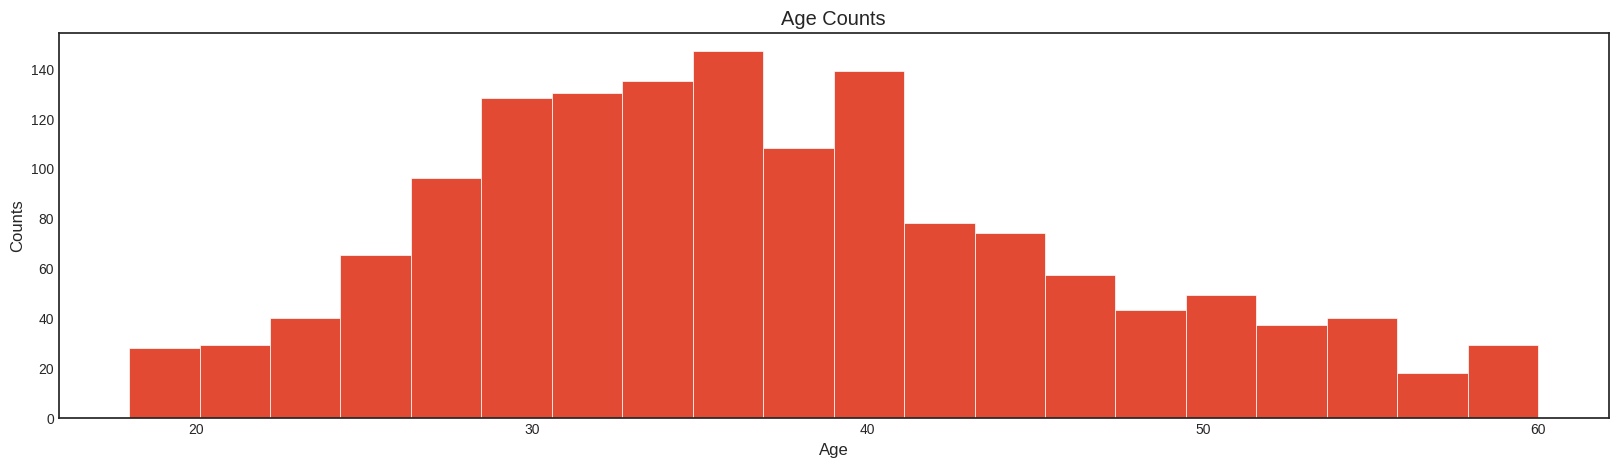

In [10]:
plt.figure(figsize=(20,5))
plt.hist(HR.Age,bins=20)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

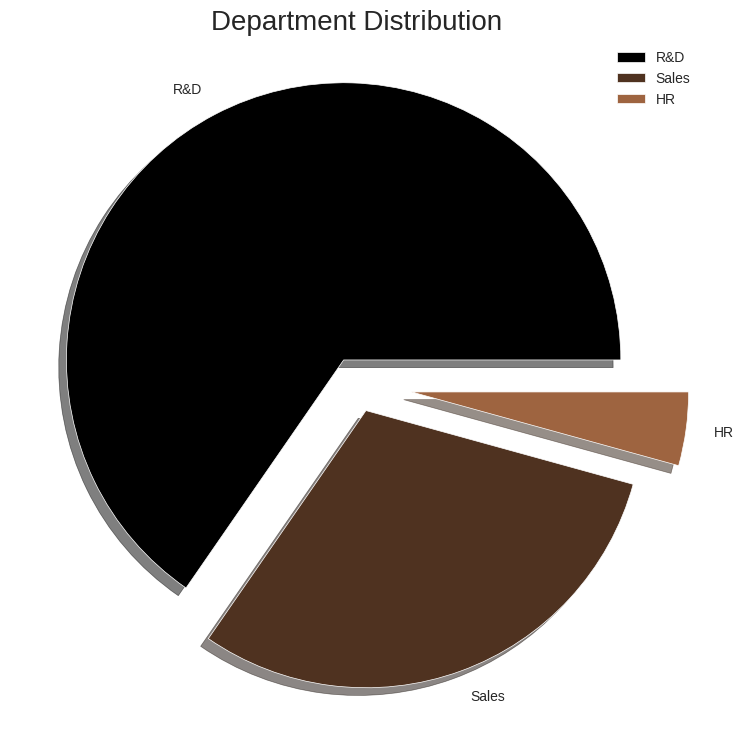

In [11]:
labels = ['R&D', 'Sales', 'HR']
sizes = HR['Department'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Department Distribution', fontsize = 20)
plt.legend()
plt.show()

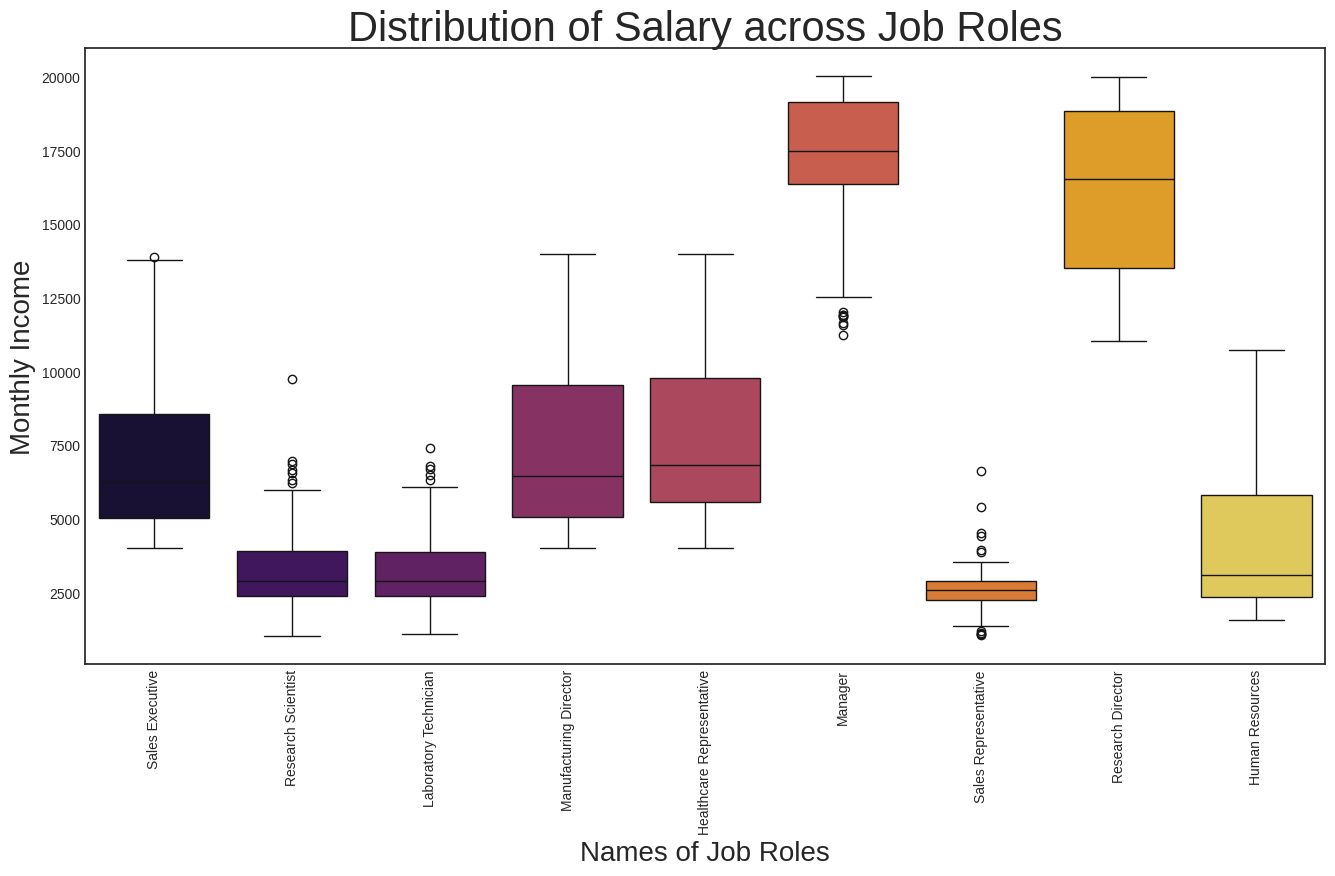

In [12]:
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = HR['JobRole'], y =HR['MonthlyIncome'], data = HR, palette = 'inferno')
ax.set_xlabel(xlabel = 'Names of Job Roles', fontsize = 20)
ax.set_ylabel(ylabel = 'Monthly Income', fontsize = 20)
ax.set_title(label = 'Distribution of Salary across Job Roles', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

<Figure size 1000x500 with 0 Axes>

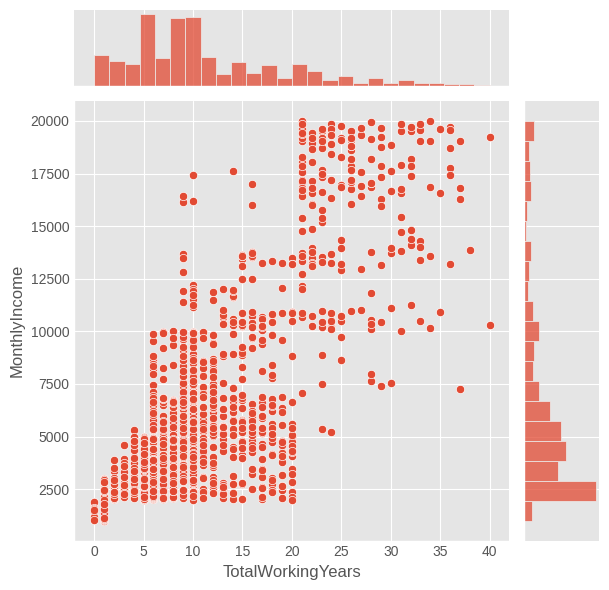

In [13]:

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=HR)

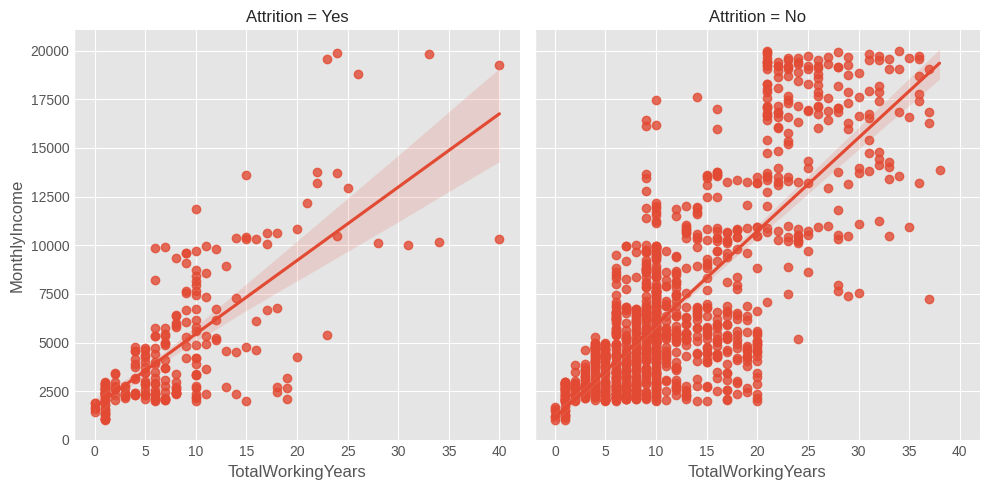

In [14]:
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = HR, col = 'Attrition')
plt.show()

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

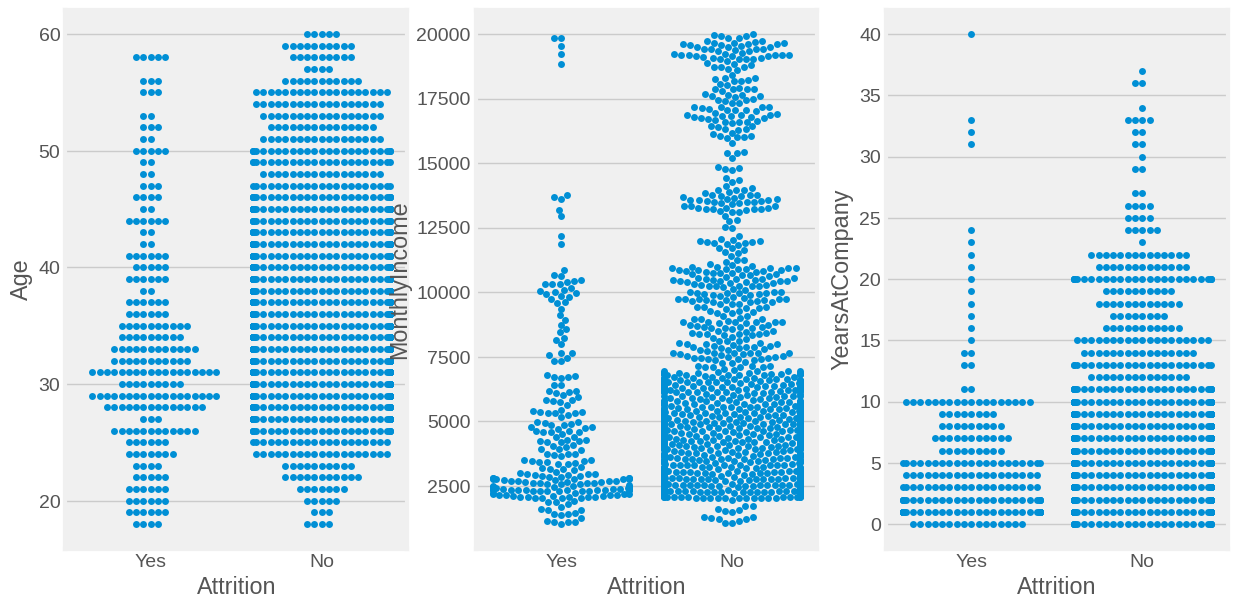

In [15]:
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')
plt.subplot(131)
sns.swarmplot(x="Attrition", y="Age", data=HR)
plt.subplot(132)
sns.swarmplot(x="Attrition", y="MonthlyIncome", data=HR)
plt.subplot(133)
sns.swarmplot(x="Attrition", y="YearsAtCompany", data=HR)

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

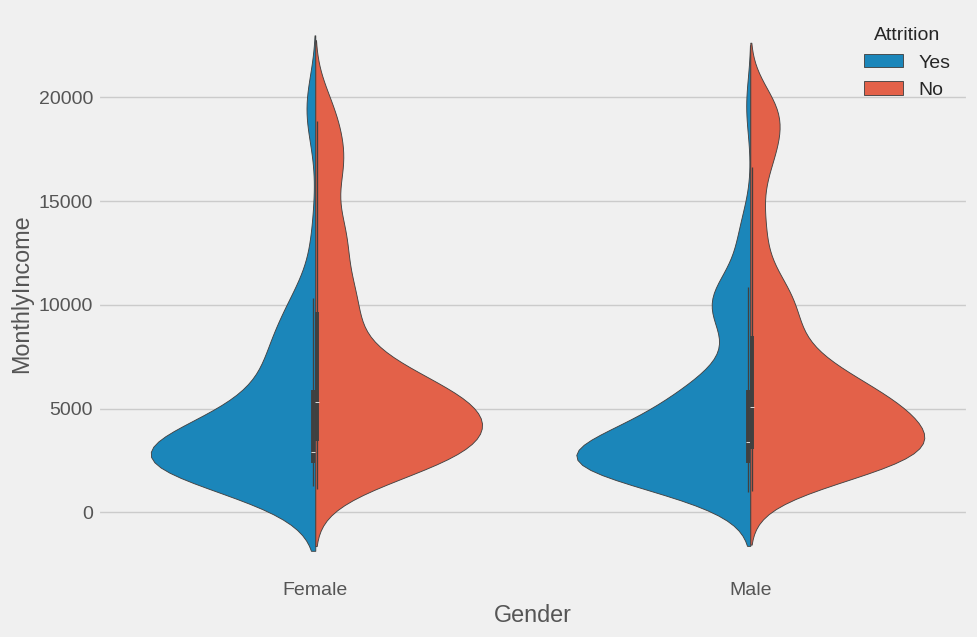

In [16]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=HR)

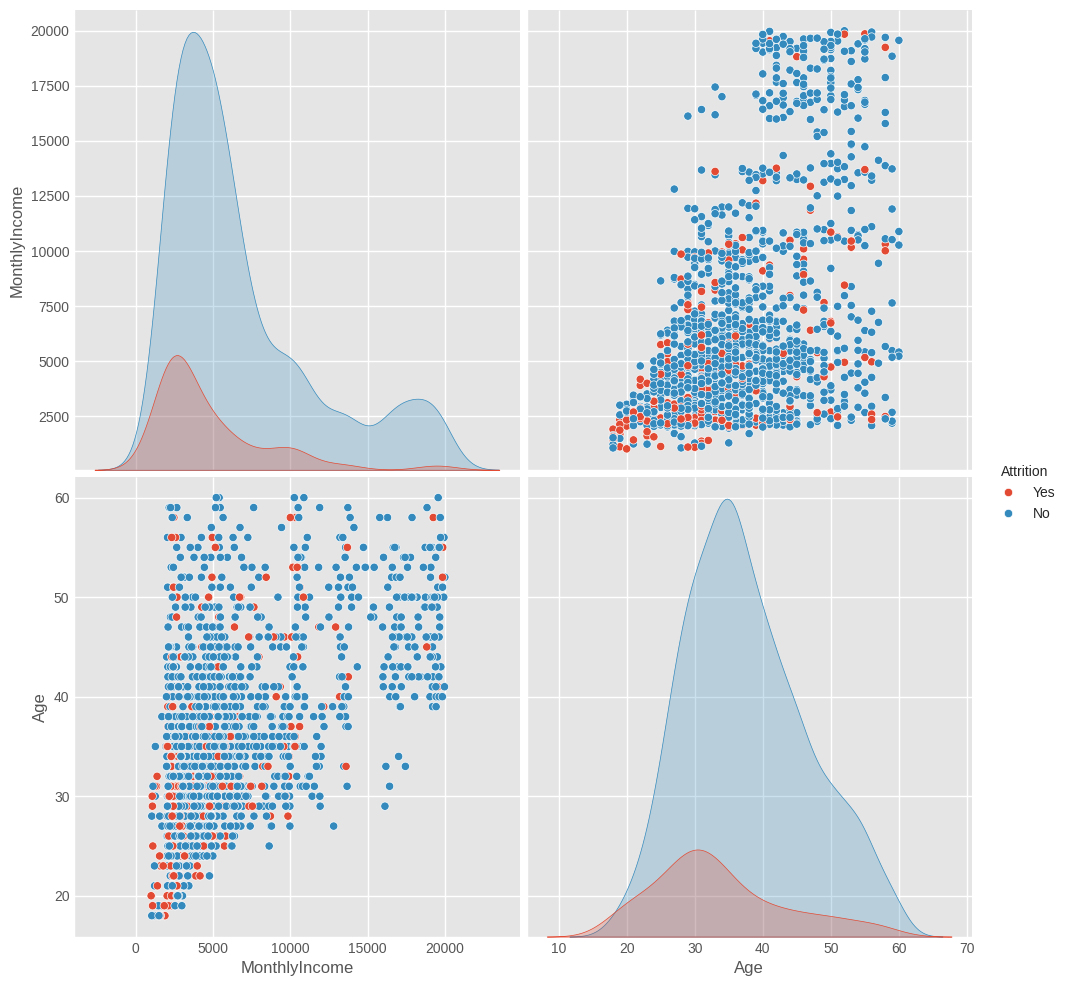

In [17]:
plt.style.use('ggplot')
g = sns.pairplot(HR, vars=["MonthlyIncome", "Age"],hue="Attrition",size=5)

ENCODING

In [18]:
s = (HR.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [19]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data
label_data = HR.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(HR[col])


In [24]:
data_features=['Age','EnvironmentSatisfaction',
               'Gender','JobInvolvement', 'JobLevel', 'JobRole',
               'JobSatisfaction','MonthlyIncome','PerformanceRating',
               'TotalWorkingYears','YearsAtCompany','OverTime']
X=label_data[data_features]
y=label_data.Attrition

Pipelines and Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))])

In [25]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):",scores.mean())

MAE scores:
 [0.15646259 0.14285714 0.13265306 0.16326531 0.14285714]
Average MAE score (across experiments): 0.14761904761904762


Calculate Accuracy

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, X, y,
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.854422


Splitting into traning anfd test dataset

In [27]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Logisti cregression

In [28]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Decision Tree Regression

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [30]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)

In [33]:
print("Mean Absolute error of the Model:")
print(score_dataset(train_X, val_X, train_y, val_y))

Mean Absolute error of the Model:
None
